In [ ]:
import numpy as np
import pandas as pd
import mab_subjects
from banditpy.models import UCB2Arm

exps = mab_subjects.mostly_unstruc.allsess + mab_subjects.mostly_struc.allsess

ucb_df = []
for e, exp in enumerate(exps):

    task = exp.b2a.filter_by_trials(100, 100)
    model = UCB2Arm(task)
    model.fit()

    df = pd.DataFrame(
        {
            "name": exp.sub_name,
            "param": list(model.params.keys()),
            "param_values": list(model.params.values()),
            "grp": exp.group_tag,
            "dataset": exp.data_tag,
            "lesion": exp.lesion_tag,
        }
    )
    ucb_df.append(df)

ucb_df = pd.concat(ucb_df, ignore_index=True)

Using session start flags for resets
Using session start flags for resets
Using session start flags for resets
Using session start flags for resets
Using session start flags for resets
Using session start flags for resets
Using session start flags for resets
Using session start flags for resets
Using session start flags for resets
Using session start flags for resets


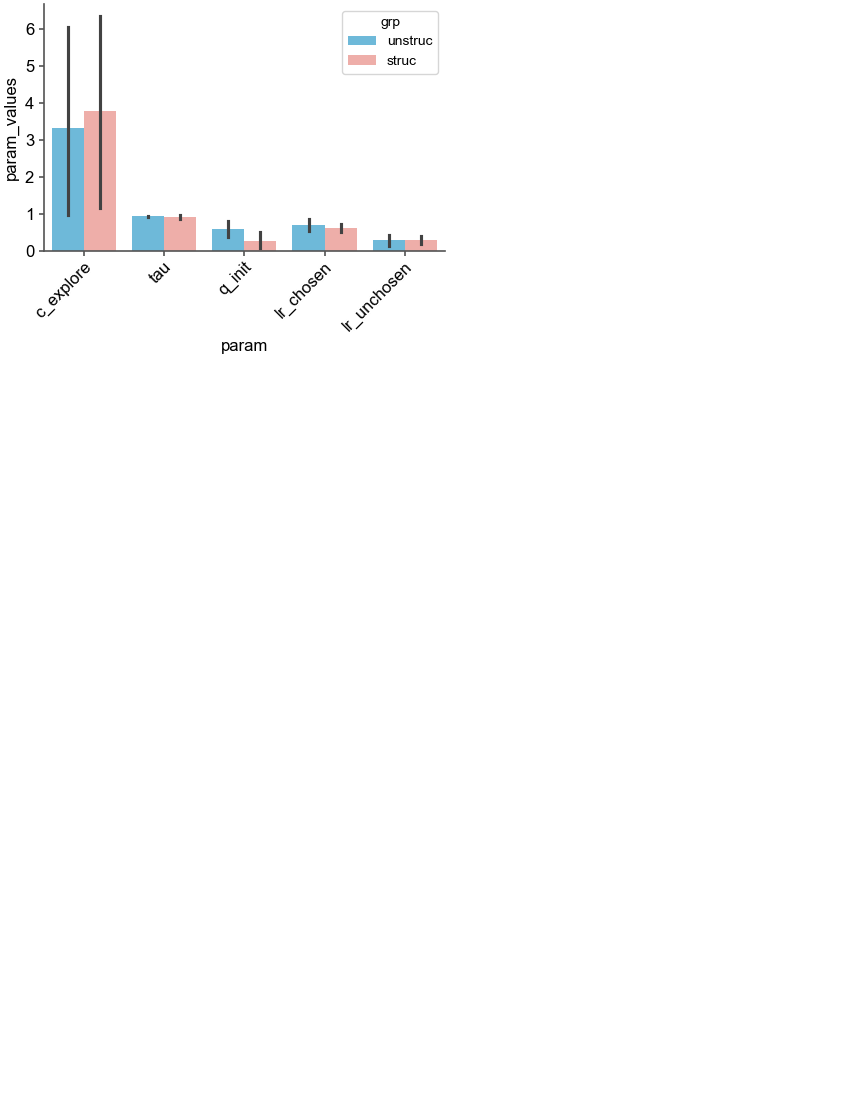

In [ ]:
import seaborn as sns
from neuropy import plotting
from statplotannot.plots import xtick_format

fig = plotting.Fig(4, 2, fontsize=12)

ax = fig.subplot(fig.gs[0, 0])

sns.barplot(data=ucb_df, x="param", y="param_values", errorbar="se", hue="grp", ax=ax)
xtick_format(ax, rotation=45)

In [ ]:
mab_subjects.GroupData()